# <span style="color:red;font-family:Helvetica"> PREDICT THE SURVIVAL OF TITANIC PASSENGERS USING ML

# Problem Statement

Make a machine learning model that will can predict the survival or the death of a given passenger based on a set of variables describing their such as age, sex, or passenger class on the boat.

# Frame of the Problem

The test set should be used to see how well our model performs on unseen data. For the test set, the ground truth for each passenger is `not provided`. It is job to predict these outcomes. For each passenger in the test set, i use the trained model to predict whether or not they survived the sinking of the Titanic. I will use **Cross-validation** for evaluating the performance.

I've two datasets are available, a `train set` and a `test set`. I'll be using the training set to build my predictive model and  i have to take the predictions on the testing set. This is a binary classification problem

# About the Datasets

There are two Data sets Provide train set and test set.<br>
Training data set has the columns:<br>
* PassengerID
* PClass
* Name
* Sex
* Age 
* Embarked
* Parch
* SibSp
* Ticket 
* Fare
* Cabin
* Survived (Target Column)<br>

Testing Dataset also having the same columns but it does not have the Survived column i.e. Target column our job is to make preditions on them

# Attributes Information

* <span style="color:red">PassengerID:</span> Individual ID of each Passenger.
* <span style="color:red">PClass:</span> Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd).
* <span style="color:red">Sex:</span> Male or Female
* <span style="color:red">Name:</span> Name of the passenger.
* <span style="color:red">Age:</span> Age of the Passenger.
* <span style="color:red">Embarked:</span> Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).
* <span style="color:red">Parch:</span> Number of Parents/Children Aboard.
* <span style="color:red">SibSp:</span> Number of Siblings/Spouses Aboard.
* <span style="color:red">Ticket:</span> Ticket Number.
* <span style="color:red">Fare:</span> Passenger Fare.
* <span style="color:red">Cabin:</span> Cabin
* <span style="color:red">Survived:</span> Survival (0 = No; 1 = Yes)

# Libraries Used 

* Numpy
* Pandas
* Matplotlib
* Seaborn
* Sklearn
* Statistics
* Warning
* Collections

# Steps

* Importing the Essential libraries
* Loading the Data
* Perform Exploratory Data Analysis
* Detect the Outliers
* Remove the Outliers
* Check the Missing Values
* Missing Value Treatment
* Feature Extraction
* Data Visualisation(Univariate Analysis)
* Data Visualisation(Bivariate Analysis)
* Creating the Dummy Variables
* Splitting the features and target variable
* preprocess the data (Standardising the data) 
* Splitting the data into Train set and Validation set
* Fit the models using different Algorithms
* Checking the accuracy of all models
* Tuning Hyperparameters
* Ensemble Modelling
* Generating Final Predictions on the test set

# CODE 

# Importing Essential Libraries

In [1]:
#importing essential libraries for Analysation and Visualisation
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import mode
from collections import Counter
from matplotlib import pyplot as plt
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
%matplotlib inline


#importing essential libraries for Machine Learning Model Building
from sklearn import set_config
set_config(print_changed_only=False)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn import tree

# Loading the Datasets

In [2]:
# load the datasets using pandas's read_csv method
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# concat these two datasets, this will come handy while processing the data
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

# separately store ID of test datasets, 
# this will be using at the end of the task to predict.
TestPassengerID = test['PassengerId']

# Exploratory Data Analysis

In [3]:
# data.head() is used to display the first 5 rows of the data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Rows and columns in all the Data
print("shape of Train Data: ",train.shape)
print("shape of Test Data: ",test.shape)
print("shape of Full Data: ",dataset.shape)

shape of Train Data:  (891, 12)
shape of Test Data:  (418, 11)
shape of Full Data:  (1309, 12)


In [7]:
# Analysing the Data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
# .describe() performs some Mathematical operations such as mean, std, max, min, etc. on all numeric columns
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [12]:
# Checking the names of all the columns
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
# Defining the function which will print the Value counts in each column followed by datatype of that columns
def value_counts():
    for i in train.columns:
        print("Dtype: ",train[i].dtype)
        print(train[i].value_counts())
        print(" ")
        print(" ")
        
        
# calling the function value_counts()
value_counts()

Dtype:  int64
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
 
 
Dtype:  int64
0    549
1    342
Name: Survived, dtype: int64
 
 
Dtype:  int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
 
 
Dtype:  object
Rice, Master. Eric                1
Hendekovic, Mr. Ignjac            1
Hart, Miss. Eva Miriam            1
Vande Walle, Mr. Nestor Cyriel    1
Palsson, Master. Gosta Leonard    1
                                 ..
Fortune, Mr. Charles Alexander    1
Nysveen, Mr. Johan Hansen         1
Padro y Manent, Mr. Julian        1
Gallagher, Mr. Martin             1
Bishop, Mr. Dickinson H           1
Name: Name, Length: 891, dtype: int64
 
 
Dtype:  object
male      577
female    314
Name: Sex, dtype: int64
 
 
Dtype:  float64
24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype:

# Outlier Treatment

### Detecting Outliers

In [16]:
# Defining & calling the function outliers() which will detect the outliers in the training Data

def outliers(df,n,features):
    
    outlier_indices = []
    
    for col in features:
        
        Q1 = np.percentile(df[col], 25) # 1st quartile
        
        Q3 = np.percentile(df[col],75)  # 3rd quartile
        
        IQR = Q3 - Q1                   # IQR
        
        outlier_step = 1.5 * IQR        # outlier step
        
        # Determine a list of indices of outliers for feature col
        
        outlier_list = df[(df[col]<Q1 - outlier_step) | (df[col]>Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list)
   
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)  

    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   

Outliers_to_drop = outliers(train,2,["Age","SibSp","Parch","Fare"])

### Removing Outliers

In [17]:
# Removing the outliers from the train Data
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

# Again concatinating the data as train data got updated
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

# Treating Missing Values

### Detecting Missing Values

In [18]:
# Defining the function in which Dataset will be passed as an Argument
# It will print the sum of missing values in the column followed by the Heatmap

def missing_values(data):
    
    # sum of missing values
    Total = data.isnull().sum().sort_values(ascending = False)
    print(Total)
    
    # heatmap for missing values
    heatmap = sns.heatmap(data.isnull(), cbar = False, yticklabels = False, cmap = 'cividis')
    heatmap


Cabin          680
Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


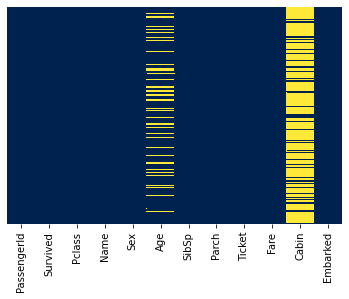

In [19]:
# calling the function missing_values() for the training Dataset
missing_values(train)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64


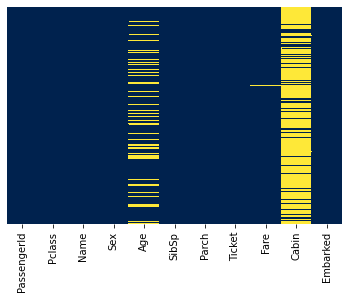

In [20]:
# calling the function missing_values() for the testing Dataset
missing_values(test)

Cabin          1007
Survived        418
Age             256
Embarked          2
Fare              1
PassengerId       0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
dtype: int64


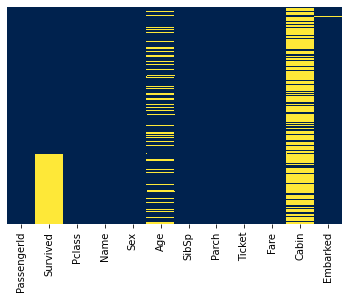

In [21]:
# calling the function missing_values() for the combined Dataset
missing_values(dataset)

### Filling Missing Values

Now, missing values are detected successfully, it's time to fill them.

Firstly, Filling the missing Values in the Age column

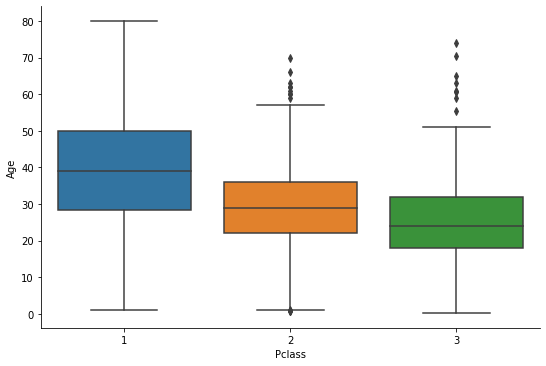

In [22]:
#Analysing the Boxplot for PClass V/S Age column
sns.catplot(x="Pclass", y="Age", kind="box", data=dataset,height=5,aspect=1.5)
plt.show()

From the above plot we can conclude that,<br>
For PClass=1, median Age is 37,<br>
similarly, for pClass=2, median Age is 29,<br>
similarly, for pClass=3, median Age is 24

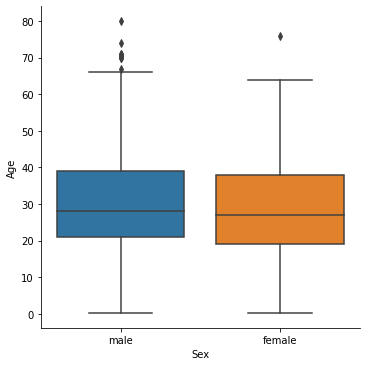

In [23]:
# Analysing Sex V/S Age column
sns.catplot(x="Sex", y="Age", kind="box", data=dataset,height=5,aspect=1)
plt.show()

Using the above gained information for filling the missing values in Age column

In [24]:
#creating he function to fill missing values in age column

def Age(df):
    
    Age = df[0]
    Pclass = df[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1: 
            return 37
        
        elif Pclass == 2: 
            return 29
        
        else: 
            return 24
    
    else:
        return Age

In [25]:
# Filling the Age

dataset['Age'] = dataset[['Age' , 'Pclass']].apply(Age, axis = 1)

Cabin          1007
Survived        418
Embarked          2
Fare              1
PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
dtype: int64


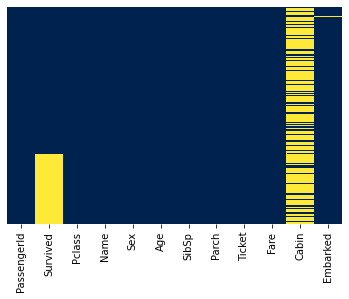

In [26]:
#Checking the age column

missing_values(dataset)

Now, processing the missing values in Fare column

In [27]:
#imputing the median of fare for missing values

dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())

Now, processing the missing values in Embarked column

In [28]:
#imputing the mode of Embarked for missing values as it is the Categorical variable

dataset["Embarked"] = dataset["Embarked"].fillna(dataset["Embarked"].mode()[0])

In [29]:
# Cabin column has approximately 80% of missing values
# So, it is better to remove this column, as this column will not be helpful

dataset.drop("Cabin",axis=1,inplace=True)

In [30]:
# Separate train dataset and test dataset
# As missing values are computed in combined dataset
# After splitting the the changes will also be reflected in the individual dataset

train = dataset[:len(train)]
test = dataset[len(train):]
test.drop("Survived",axis = 1,inplace = True)

Finally, lets check weather all missing values are removed or not

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


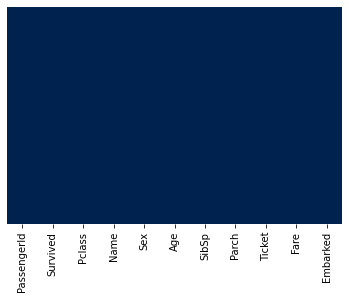

In [31]:
# Checking missing values in train set

missing_values(train)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


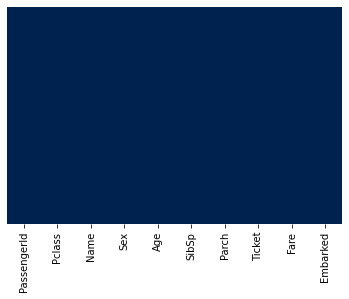

In [32]:
# Checking missing values in test set

missing_values(test)

In [33]:
# Checking the updated Shape of both Datasets

print("Shape for training Data: ",train.shape)
print("Shape for testing Data:  ",test.shape)

Shape for training Data:  (881, 11)
Shape for testing Data:   (418, 10)


# Feature Extraction

In [34]:
# Checking the Name Column

dataset["Name"]

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1294                                   Spector, Mr. Woolf
1295                         Oliva y Ocana, Dona. Fermina
1296                         Saether, Mr. Simon Sivertsen
1297                                  Ware, Mr. Frederick
1298                             Peter, Master. Michael J
Name: Name, Length: 1299, dtype: object

In [35]:
# Making the new Feature named Salutation
# this contains the Salutation of each Passenger
# Salutation will be extracted from the name column

salutaion=[]
for i in dataset["Name"]:
    dataset_salutation = i.split(",")[1].split(".")[0].strip()
    salutaion.append(dataset_salutation)

In [36]:
dataset["Salutation"] = pd.Series(salutaion)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Salutation
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [37]:
# Checking the salutation feature

dataset["Salutation"].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Jonkheer          1
Don               1
Dona              1
Mme               1
Sir               1
Lady              1
Capt              1
the Countess      1
Name: Salutation, dtype: int64

In [38]:
# Combining the sparse classes with the name rare
# All the rare salutations will be combined in this class

dataset["Salutation"]=dataset["Salutation"].replace(['Lady', 'the Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset["Salutation"].value_counts()

Mr        753
Miss      255
Mrs       197
Master     60
Rare       29
Mlle        2
Ms          2
Mme         1
Name: Salutation, dtype: int64

In [39]:
# Convert to categorical values Salutation

dataset["Salutation"]=dataset["Salutation"].map({
    "Master":0, 
    "Miss":1, 
    "Ms" : 1 ,
    "Mme":1, 
    "Mlle":1,
    "Mrs":1, 
    "Mr":2, 
    "Rare":3
})
dataset["Salutation"].value_counts()

2    753
1    457
0     60
3     29
Name: Salutation, dtype: int64

In [40]:
# Generating the New Feature Family size named as famize
# It will be generated by Adding the SibSp and Prach Feature +1(that individual Person)

dataset["Famize"] = dataset["SibSp"] + dataset["Parch"] + 1
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Salutation,Famize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2,1


In [41]:
# Dropping some Unnecessary columns

dataset.drop(["PassengerId","Name","Ticket","SibSp","Parch"],axis=1,inplace=True)
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Salutation,Famize
0,0.0,3,male,22.0,7.2500,S,2,2
1,1.0,1,female,38.0,71.2833,C,1,2
2,1.0,3,female,26.0,7.9250,S,1,1
3,1.0,1,female,35.0,53.1000,S,1,2
4,0.0,3,male,35.0,8.0500,S,2,1


In [42]:
dataset.dtypes

Survived      float64
Pclass          int64
Sex            object
Age           float64
Fare          float64
Embarked       object
Salutation      int64
Famize          int64
dtype: object

In [43]:
# Changing the Type to Objects for few columns for better Analyzing
dataset = dataset.astype({
    "Pclass":"object",
    "Salutation":"object",
    "Survived":"object",
    "Famize":"object"
})

In [44]:
# Again splitting the train and test data set for getting the updated Dataset

train = dataset[:len(train)]
test = dataset[len(train):]
test.drop("Survived",axis = 1,inplace = True)

# Data Visualisation

In [45]:
# Defining the function which will print the Feature names based on type
# continous or categorical

def cols(df):
    
    categorical_col=[]
    continuous_col=[]
    
    columns=list(df.columns)
    
    for j in columns:
        if df[j].dtype=="object":
            categorical_col.append(j)
            
        else: 
            continuous_col.append(j)
    
    print("Categorical columns: ",categorical_col)
    print("Continuous columns:  ",continuous_col)

In [46]:
# calling the cols() function

cols(train)

Categorical columns:  ['Survived', 'Pclass', 'Sex', 'Embarked', 'Salutation', 'Famize']
Continuous columns:   ['Age', 'Fare']


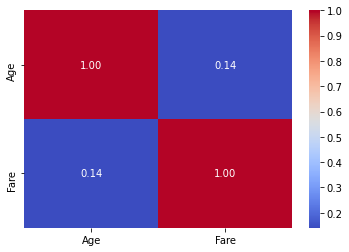

In [47]:
# Print the correlation heatmap between numeric colums
sns.heatmap(train[['Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.show()

### Univariate Analysis

In [48]:
# Defining the function to perform Univariate Analysis
# A column name will be passed as a argument in function
# It will print the value counts of that column followed by the Bar graph or histogram based on the type of column

def univariate_analysis(i):
    
    #if the passed column is categorical then if block will be executed
    # it will print the Bargraph
    
    if train[i].dtype=="object":
        
        print(train[i].value_counts()/len(train)*100)
        
        print(" ")
        
        plt.title(i)
        (train[i].value_counts()/len(train)*100).plot(kind="bar")
    
    # if the passed column is numeric then else block will be executed
    # it will print the Histogram
    
    else:
        print(train[i].value_counts()/len(train)*100)
        
        print(" ")
        
        plt.title(i)
        train[i].plot.hist()

3    54.937571
1    24.177072
2    20.885358
Name: Pclass, dtype: float64
 


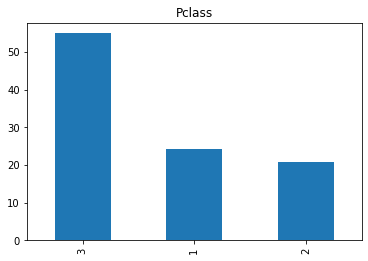

In [49]:
# Visualisation for Pclass column

univariate_analysis("Pclass")

male      64.92622
female    35.07378
Name: Sex, dtype: float64
 


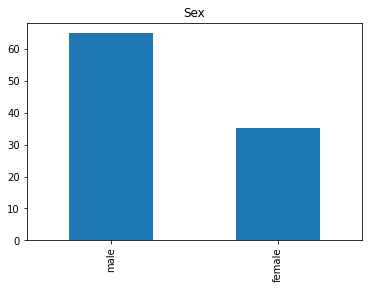

In [50]:
# Visualisation for Sex column

univariate_analysis("Sex")

S    72.190692
C    19.069240
Q     8.740068
Name: Embarked, dtype: float64
 


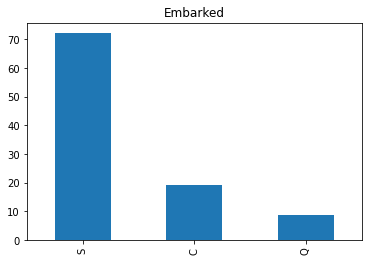

In [51]:
# Visualisation for Embarked column

univariate_analysis("Embarked")

2    58.229285
1    34.733258
0     4.426788
3     2.610670
Name: Salutation, dtype: float64
 


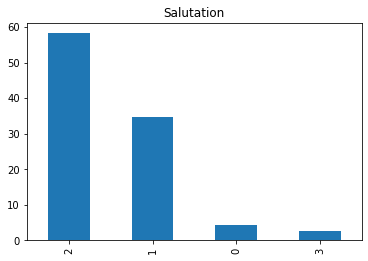

In [52]:
# Visualisation for Salutation column

univariate_analysis("Salutation")

0.0    61.407491
1.0    38.592509
Name: Survived, dtype: float64
 


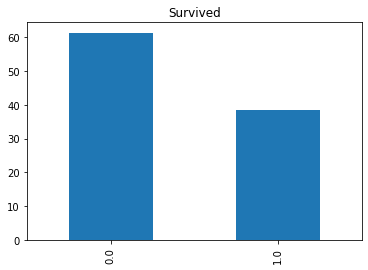

In [53]:
# Visualisation for Survived column

univariate_analysis("Survived")

24.00    17.934166
37.00     4.086266
29.00     3.518729
22.00     3.064699
18.00     2.951192
           ...    
36.50     0.113507
55.50     0.113507
0.92      0.113507
70.50     0.113507
74.00     0.113507
Name: Age, Length: 88, dtype: float64
 


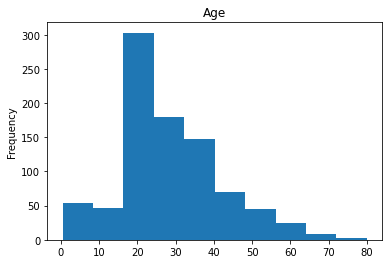

In [54]:
# Visualisation for Age column

univariate_analysis("Age")

8.0500     4.880817
13.0000    4.767310
7.8958     4.313280
7.7500     3.859251
26.0000    3.518729
             ...   
50.4958    0.113507
13.8583    0.113507
8.4583     0.113507
7.7250     0.113507
7.5208     0.113507
Name: Fare, Length: 247, dtype: float64
 


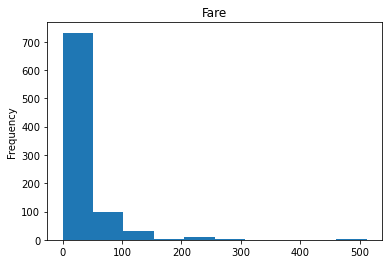

In [55]:
# Visualisation for Age column

univariate_analysis("Fare")

1    60.953462
2    18.274688
3    11.577753
4     3.291714
6     2.156640
5     1.702611
7     1.362089
8     0.681044
Name: Famize, dtype: float64
 


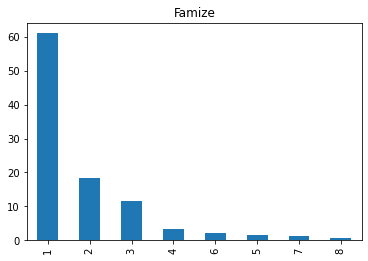

In [56]:
# Visualisation for Famize column

univariate_analysis("Famize")

### Bivariate Analysis

In [57]:
# Defining the function for the Bivariate analysis
# It will take 2 Columns as the arguments

def bivariate_analysis(i,j):
    
    if train[i].dtype==train[j].dtype=="object":
    
        sns.countplot(x=train[i],hue = train[j])
        
    elif train[i].dtype==train[j].dtype=="float64":
        
        sns.jointplot(data=train, x = i, y = j)
        
    else:
        sns.catplot(x=i, y=j,kind="bar",data=train)

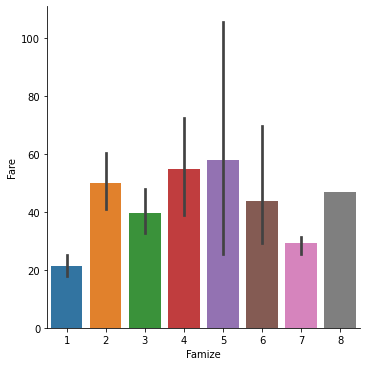

In [58]:
# Visualisation for Famize V/S Fare

bivariate_analysis("Famize","Fare")

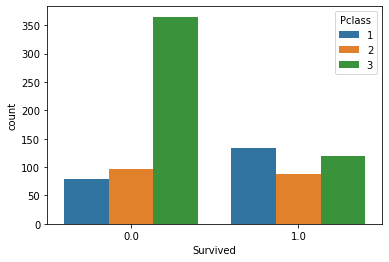

In [59]:
# Visualisation for Survived V/S PClass

bivariate_analysis("Survived","Pclass")

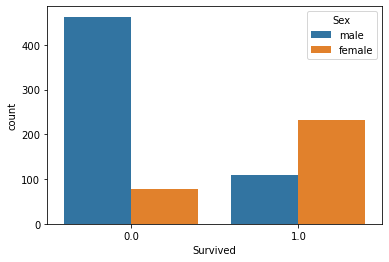

In [60]:
# Visualisation for Survived V/S Sex

bivariate_analysis("Survived","Sex")

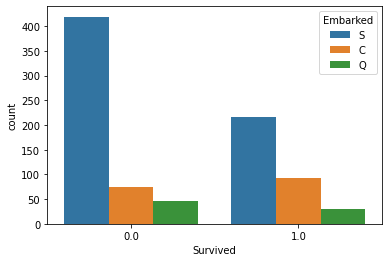

In [61]:
# Visualisation for Survived V/S Embarked

bivariate_analysis("Survived","Embarked")

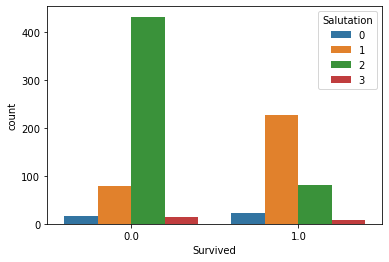

In [62]:
# Visualisation for Survived V/S Salutation

bivariate_analysis("Survived","Salutation")

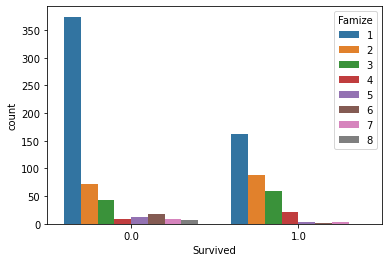

In [63]:
# Visualisation for Survived V/S Famize

bivariate_analysis("Survived","Famize")

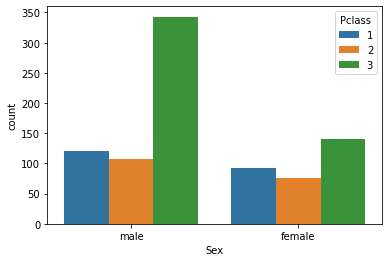

In [64]:
# Visualisation for Sex V/S PClass

bivariate_analysis("Sex","Pclass")

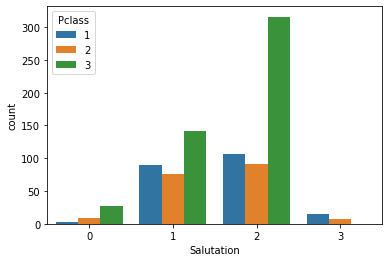

In [65]:
# Visualisation for Salutation V/S Pclass

bivariate_analysis("Salutation","Pclass")

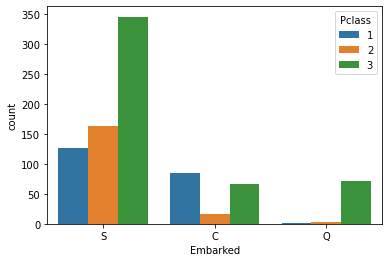

In [66]:
# Visualisation for Embarked V/S PClass

bivariate_analysis("Embarked","Pclass")

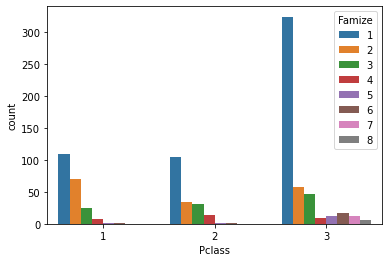

In [67]:
# Visualisation for Pclass V/S Famize

bivariate_analysis("Pclass","Famize")

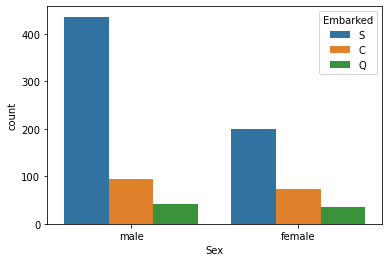

In [68]:
# Visualisation for Sex V/S Embarked

bivariate_analysis("Sex","Embarked")

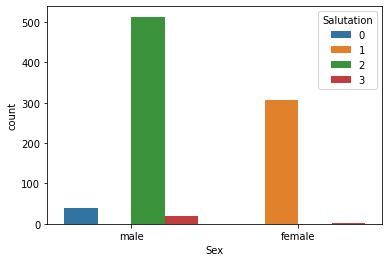

In [69]:
# Visualisation for Sex V/S Salutation

bivariate_analysis("Sex","Salutation")

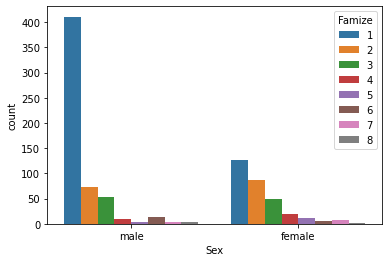

In [70]:
# Visualisation for Sex V/S Famize

bivariate_analysis("Sex","Famize")

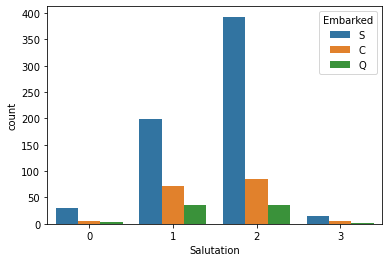

In [71]:
# Visualisation for Salutation V/S Embarked

bivariate_analysis("Salutation","Embarked")

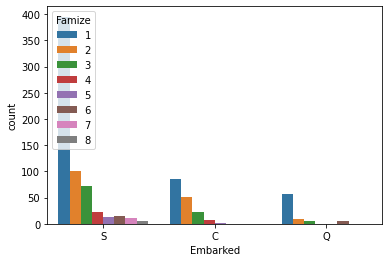

In [72]:
# Visualisation for Embarked V/S Famize

bivariate_analysis("Embarked","Famize")

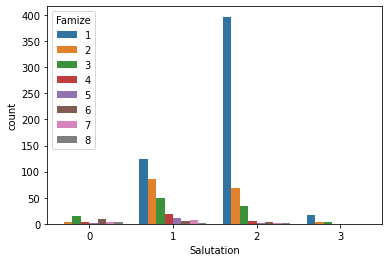

In [73]:
# Visualisation for Salutation V/S Famize

bivariate_analysis("Salutation","Famize")

# Creating the Dummy Variables

In [74]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Salutation,Famize
0,0.0,3,male,22.0,7.2500,S,2,2
1,1.0,1,female,38.0,71.2833,C,1,2
2,1.0,3,female,26.0,7.9250,S,1,1
3,1.0,1,female,35.0,53.1000,S,1,2
4,0.0,3,male,35.0,8.0500,S,2,1


In [75]:
# Creating the Dummy variables of the Sex Feature
# then deleting the original Sex column

sex = pd.get_dummies(dataset['Sex'], drop_first = True)
dataset = pd.concat([dataset,sex], axis = 1)
dataset.drop(['Sex'] , axis = 1 , inplace = True)

# Creating the dummy variable for the embarked column
# then dropping original Embarked column

embarked = pd.get_dummies(dataset["Embarked"])
dataset = pd.concat([dataset,embarked], axis = 1)
dataset.drop(["Embarked"] , axis = 1 , inplace = True)

dataset.head()

,Survived,Pclass,Age,Fare,Salutation,Famize,male,C,Q,S
0,0.0,3,22.0,7.2500,2,2,1,0,0,1
1,1.0,1,38.0,71.2833,1,2,0,1,0,0
2,1.0,3,26.0,7.9250,1,1,0,0,0,1
3,1.0,1,35.0,53.1000,1,2,0,0,0,1
4,0.0,3,35.0,8.0500,2,1,1,0,0,1


In [76]:
# renaming the Embarked Classes column

dataset = dataset.rename(columns = {'C': 'Embarked_C', 'Q': 'Embarked_Q','S': 'Embarked_S'})

In [77]:
# Changing the type of few features

dataset = dataset.astype({"Pclass":"int64","Salutation":"int64","Famize":"int64"})

In [78]:
# splitting the updated dataset into train and test

train = dataset[:len(train)]
test = dataset[len(train):]
test.drop("Survived",axis = 1,inplace = True)

# Predictive Modelling

### Splitting the data into Target & Featues

In [79]:
# Splitting the Training Data into Features and Targets

x = train.drop("Survived",axis=1)
y = train["Survived"].astype("int64")

### Scaling down the data

In [80]:
# Scaling down the training data using Standard scaler()

scaler = StandardScaler()
xscaled = scaler.fit_transform(x)
x = pd.DataFrame(xscaled, columns=x.columns)
x.head()

,Pclass,Age,Fare,Salutation,Famize,male,Embarked_C,Embarked_Q,Embarked_S
0,0.829632,-0.536258,-0.497646,0.662453,0.131479,0.734990,-0.485411,-0.309469,0.620661
1,-1.566780,0.667003,0.837243,-0.954226,0.131479,-1.360563,2.060109,-0.309469,-1.611185
2,0.829632,-0.235442,-0.483574,-0.954226,-0.592476,-1.360563,-0.485411,-0.309469,0.620661
3,-1.566780,0.441392,0.458180,-0.954226,0.131479,-1.360563,-0.485411,-0.309469,0.620661
4,0.829632,0.441392,-0.480968,0.662453,-0.592476,0.734990,-0.485411,-0.309469,0.620661


In [81]:
# Scaling down the testing data using Standard scaler()

test_scaled = scaler.fit_transform(test)
test = pd.DataFrame(test_scaled, columns=test.columns)
test.head()

,Pclass,Age,Fare,Salutation,Famize,male,Embarked_C,Embarked_Q,Embarked_S
0,0.873482,0.401768,-0.497413,0.729174,-0.553443,0.755929,-0.568142,2.843757,-1.350676
1,0.873482,1.371615,-0.512278,-0.900744,0.105643,-1.322876,-0.568142,-0.351647,0.740370
2,-0.315819,2.535433,-0.464100,0.729174,-0.553443,0.755929,-0.568142,2.843757,-1.350676
3,0.873482,-0.180141,-0.482475,0.729174,-0.553443,0.755929,-0.568142,-0.351647,0.740370
4,0.873482,-0.568080,-0.417492,-0.900744,0.764728,-1.322876,-0.568142,-0.351647,0.740370


### Splitting the Training Data into train and validation set

In [82]:
# Splitting the training data into train set & val set using TrainTestSplit 

x_train, x_val, y_train, y_val = tts(x,y,test_size=0.2,stratify=y,random_state=50)

### Fitting the Model using Logistic Regression

In [83]:
# Fitting the model using Logistic Regression
# Naming it as model1

model1 = LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
# Taking the predictions from the Model1
train_pred1 = model1.predict(x_train)
val_pred1 = model1.predict(x_val)

# Checking the Accruracy sCore for the predictions
print("Accuracy Score for Training Data in Logistic Regression: ",accuracy_score(train_pred1,y_train))
print("Accuracy Score for validation Data in Logistic Regression: ",accuracy_score(val_pred1,y_val))

Accuracy Score for Training Data in Logistic Regression:  0.8082386363636364
Accuracy Score for validation Data in Logistic Regression:  0.8587570621468926


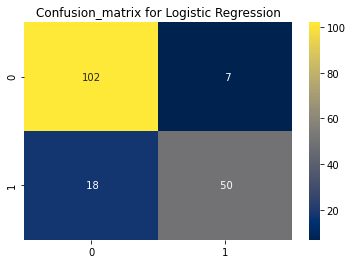

In [85]:
#Checking the confusion Matrix for Logistic Regression in the form of Heatmap

sns.heatmap(confusion_matrix(y_val,val_pred1),annot=True,fmt='3.0f',cmap="cividis")
plt.title('Confusion_matrix for Logistic Regression')
plt.show()

### Fitting the Model using K Nearest Neighbour Algorithm

In [86]:
# Creating the elbow curve to decide the Correct value of n_neighbours
# Defining the function elbow to create the curve

def elbow(k):
    
    Error=[]
    
    for i in k:
        
        model2 = KNeighborsClassifier(n_neighbors=i)
        model2.fit(x_train,y_train)
        
        temp_pred = model2.predict(x_val)
        F1=f1_score(temp_pred,y_val)
        Error.append(1-F1)
    
    return(Error)

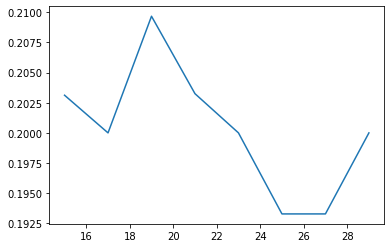

In [87]:
# Calling the function

k = range(15,30,2)
plt.plot(k,elbow(k))
plt.show()

From the above curve putting the n_neighbours = 25

In [88]:
# Fitting the KNN Model

model2 = KNeighborsClassifier(n_neighbors=25)
model2.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [89]:
# Generating the train and test predictions 

train_pred2 = model2.predict(x_train)
val_pred2 = model2.predict(x_val)

# Checking the accuracy for both Train and validation set

print("Accuracy Score for Training Data in KNN Classifier: ",accuracy_score(train_pred2,y_train))
print("Accuracy Score for validation Data in KNN Classifier: ",accuracy_score(val_pred2,y_val))

Accuracy Score for Training Data in KNN Classifier:  0.8153409090909091
Accuracy Score for validation Data in KNN Classifier:  0.8700564971751412


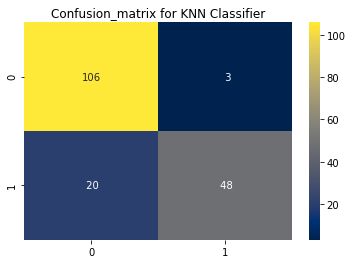

In [90]:
# Generating the Confusion Matrix in form of Heatmap

sns.heatmap(confusion_matrix(y_val,val_pred2),annot=True,fmt='3.0f',cmap="cividis")
plt.title('Confusion_matrix for KNN Classifier')
plt.show()

### Fitting the Model using Decision Tree Algorithm

In [91]:
# Fitting the model3 using Decision Tress Classifier Algorithm

model3 = DecisionTreeClassifier(random_state=50)
model3.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=50,
                       splitter='best')

In [92]:
# generating the predictions for both training and validation set

train_pred3 = model3.predict(x_train)
val_pred3 = model3.predict(x_val)

# checking the accuracy for both training and validation set

print("Accuracy Score for Training Data in Decision Tree: ",accuracy_score(train_pred3,y_train))
print("Accuracy Score for validation Data in Decision Tree: ",accuracy_score(val_pred3,y_val))

Accuracy Score for Training Data in Decision Tree:  0.984375
Accuracy Score for validation Data in Decision Tree:  0.7570621468926554


we can say that model3 i.e. Decision Tree model is Overfitted, so tuning the hyperparameters for the model3

### Hyper Parameter Tuning for Decision tree model

##### Checking for correct value of leaf nodes

In [93]:
# Making the for Loop which will generate different models for different leaf node
# then, selecting the best results

train_accuracy=[]
validation_accuracy=[]
for n in range(10,50):
    dt_model = DecisionTreeClassifier(random_state=50,max_leaf_nodes=n)
    dt_model.fit(x_train,y_train)
    dt_train_pred = dt_model.predict(x_train)
    dt_val_pred = dt_model.predict(x_val)
    train_accuracy.append(accuracy_score(dt_train_pred,y_train))
    validation_accuracy.append(accuracy_score(dt_val_pred,y_val))

In [94]:
# Converting the above results in the form of Data Frame for better understanding

frame = pd.DataFrame({
    "Max Leaf":range(10,50),
    "train_acc":train_accuracy,
    "val_acc":validation_accuracy
})
frame.head(10)

,Max Leaf,train_acc,val_acc
0,10,0.838068,0.864407
1,11,0.843750,0.858757
2,12,0.843750,0.858757
3,13,0.845170,0.858757
4,14,0.845170,0.858757
5,15,0.857955,0.841808
6,16,0.862216,0.836158
7,17,0.865057,0.836158
8,18,0.867898,0.836158
9,19,0.870739,0.836158


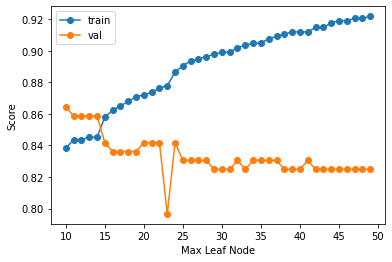

In [95]:
# Plotting the graph for Max Leaf Node V/S Train & Validation accuracy

plt.plot(frame["Max Leaf"],frame["train_acc"],marker = "o",label="train")
plt.plot(frame["Max Leaf"],frame["val_acc"],marker = "o",label="val")
plt.xlabel("Max Leaf Node")
plt.ylabel("Score")
plt.legend()
plt.show()

Form this Graph we can conclude that Max Leaf nodes should be 15

Now, fixing the max leaf nodes to 15 and repeating the above steps to check the max depth of the tree

In [96]:
# Making the for loop to fit the different models for different values of max depth and taking the best results
# Fixing the Max Leaf Node to 15

train_accuracy=[]
validation_accuracy=[]
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(random_state=50,max_depth=depth,max_leaf_nodes=15)
    dt_model.fit(x_train,y_train)
    dt_train_pred = dt_model.predict(x_train)
    dt_val_pred = dt_model.predict(x_val)
    train_accuracy.append(accuracy_score(dt_train_pred,y_train))
    validation_accuracy.append(accuracy_score(dt_val_pred,y_val))

In [97]:
frame = pd.DataFrame({
    "Max Depth":range(1,10),
    "train_acc":train_accuracy,
    "val_acc":validation_accuracy
})
frame.head(10)

,Max Depth,train_acc,val_acc
0,1,0.775568,0.858757
1,2,0.792614,0.802260
2,3,0.828125,0.858757
3,4,0.842330,0.864407
4,5,0.848011,0.858757
5,6,0.846591,0.858757
6,7,0.857955,0.841808
7,8,0.857955,0.841808
8,9,0.857955,0.841808


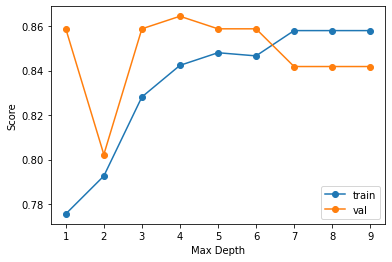

In [98]:
# Plotting the graph for Max Depth V/S Train & Validation accuracy

plt.plot(frame["Max Depth"],frame["train_acc"],marker = "o",label="train")
plt.plot(frame["Max Depth"],frame["val_acc"],marker = "o",label="val")
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

Choosing the max depth as 4 from the above Graph

### Fitting the decision tree model 

Fitting the final Decision tree model taking max depth = 4 and max leaf node = 15

In [99]:
#Fitting the Decision Tree Model

model3 = DecisionTreeClassifier(random_state=50,max_depth=4,max_leaf_nodes=15)
model3.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=50,
                       splitter='best')

In [100]:
# Generating the test and Validation Prediction

train_pred3 = model3.predict(x_train)
val_pred3 = model3.predict(x_val)

# Checking the accuracy score for the Training and validation set

print("Accuracy Score for Training Data in Decision Tree: ",accuracy_score(train_pred3,y_train))
print("Accuracy Score for validation Data in Decision Tree: ",accuracy_score(val_pred3,y_val))

Accuracy Score for Training Data in Decision Tree:  0.8423295454545454
Accuracy Score for validation Data in Decision Tree:  0.864406779661017


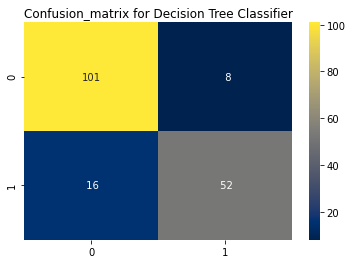

In [101]:
#Printing the confusion Matrix for validation set in the form of heatmap

sns.heatmap(confusion_matrix(y_val,val_pred3),annot=True,fmt='3.0f',cmap="cividis")
plt.title('Confusion_matrix for Decision Tree Classifier')
plt.show()

In [102]:
# Viewing the decision tree made
# Exporting the tree in the directory
# saving it in the form of "dot" format

decision_tree = tree.export_graphviz(model3,out_file="tree.dot",feature_names=x_train.columns,filled=True,max_depth=3)

In [103]:
# Converting the tree in png format

!dot -Tpng tree.dot -o tree.png

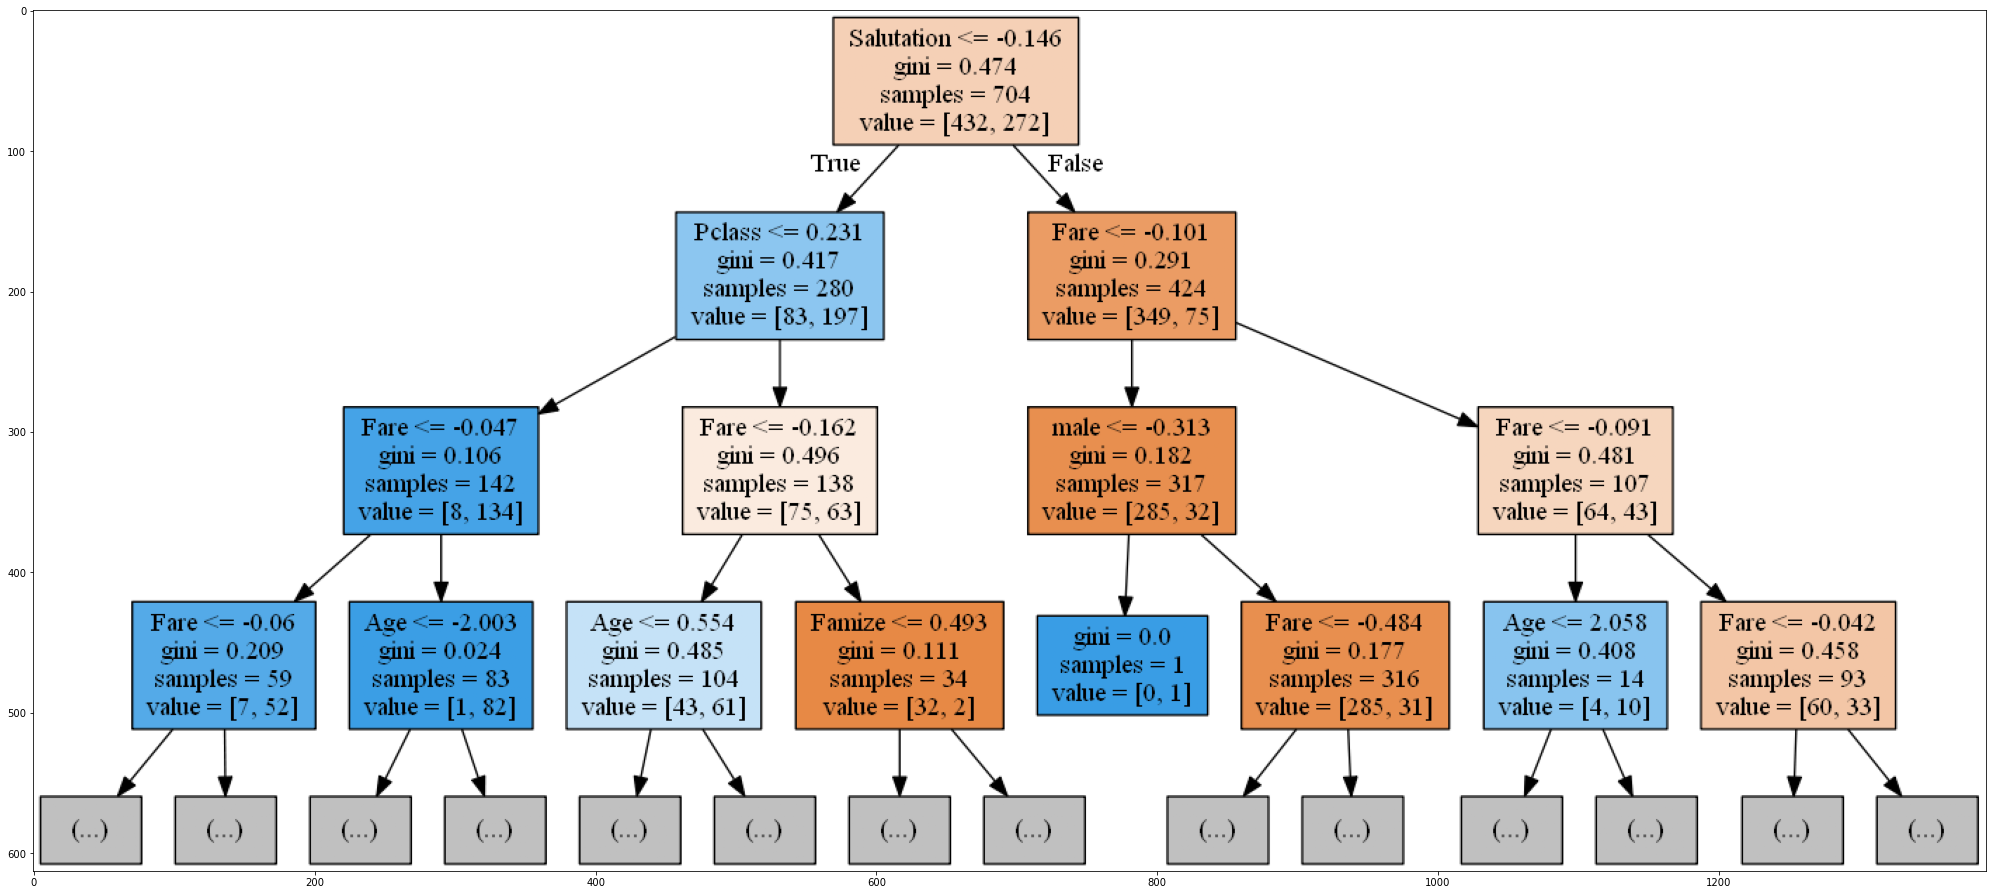

In [104]:
# Plotting the tree

image = plt.imread("tree.png")
plt.figure(figsize=(35,25))
plt.imshow(image)
plt.show()

### Fitting the model using Tandom Forest Algorithm

In [105]:
# Fitting the model

model4 = RandomForestClassifier(random_state=50)
model4.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [106]:
# taking the predictions on both the training and validation set 

train_pred4 = model4.predict(x_train)
val_pred4 = model4.predict(x_val)

# checking the accuracy for both the training and validation set 

print("Accuracy Score for Training Data in Random forest: ",accuracy_score(train_pred4,y_train))
print("Accuracy Score for Testing Data in Random Forest: ",accuracy_score(val_pred4,y_val))

Accuracy Score for Training Data in Random forest:  0.984375
Accuracy Score for Testing Data in Random Forest:  0.7909604519774012


Model fitted is overfitted so, lets tune the hyperparameters for the model and make the best fit

##### Hyperprameter tuning for the Random Forest model

In [107]:
# Generating the best valye for max depth 
# Following the same steps as the above

train_accuracy=[]
val_accuracy=[]
for depth in range(1,10):
    rf_model = RandomForestClassifier(random_state=50,max_depth=depth)
    rf_model.fit(x_train,y_train)
    train_accuracy.append(rf_model.score(x_train,y_train))
    val_accuracy.append(rf_model.score(x_val,y_val))

In [108]:
frame = pd.DataFrame({
    "Max Depth":range(1,10),
    "train_acc":train_accuracy,
    "val_acc":val_accuracy
})
frame.head(10)

,Max Depth,train_acc,val_acc
0,1,0.771307,0.858757
1,2,0.812500,0.870056
2,3,0.821023,0.870056
3,4,0.825284,0.881356
4,5,0.850852,0.858757
5,6,0.887784,0.847458
6,7,0.897727,0.841808
7,8,0.913352,0.841808
8,9,0.931818,0.824859


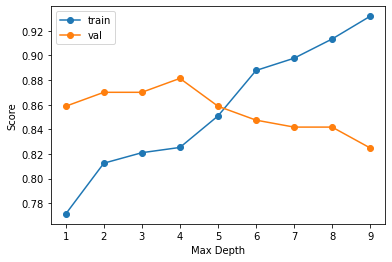

In [109]:
# plotting the graph between max depth V/S Train and vaidation accuracy

plt.plot(frame["Max Depth"],frame["train_acc"],marker = "o",label="train")
plt.plot(frame["Max Depth"],frame["val_acc"],marker = "o",label="val")
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

Taking the max depth = 6, and generating the best value for the max leaf node

In [110]:
# Generating the best value for the max leaf node
# Fixing the depth = 6

train_accuracy=[]
val_accuracy=[]
for n in range(10,50):
    rf_model = RandomForestClassifier(random_state=50,max_depth=6,max_leaf_nodes=n)
    rf_model.fit(x_train,y_train)
    rf_train_pred = rf_model.predict(x_train)
    rf_val_pred = rf_model.predict(x_val)
    train_accuracy.append(accuracy_score(rf_train_pred,y_train))
    val_accuracy.append(accuracy_score(rf_val_pred,y_val))

In [111]:
frame = pd.DataFrame({
    "Max Leaf":range(10,50),
    "train_acc":train_accuracy,
    "val_acc":val_accuracy
})
frame.head(10)

,Max Leaf,train_acc,val_acc
0,10,0.842330,0.864407
1,11,0.843750,0.864407
2,12,0.846591,0.864407
3,13,0.845170,0.864407
4,14,0.848011,0.864407
5,15,0.849432,0.864407
6,16,0.855114,0.864407
7,17,0.860795,0.864407
8,18,0.863636,0.858757
9,19,0.865057,0.858757


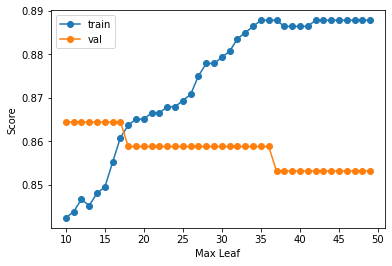

In [112]:
# plotting the Graph

plt.plot(frame["Max Leaf"],frame["train_acc"],marker = "o",label="train")
plt.plot(frame["Max Leaf"],frame["val_acc"],marker = "o",label="val")
plt.xlabel("Max Leaf")
plt.ylabel("Score")
plt.legend()
plt.show()

### Fitting the final Random Forest Model

In [113]:
# Fitting the model
# setting the max depth = 6 and max Leaf node = 35

model4 = RandomForestClassifier(random_state=50,max_depth=6,max_leaf_nodes=35)
model4.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=35, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [114]:
# generating the prediction for thr training and validation set 
train_pred4 = model4.predict(x_train)
val_pred4 = model4.predict(x_val)

# Checking the accuracy for both the training and validation 

print("Accuracy Score for Training Data in Random Forest: ",accuracy_score(train_pred4,y_train))
print("Accuracy Score for validation Data in Random Forest: ",accuracy_score(val_pred4,y_val))

Accuracy Score for Training Data in Random Forest:  0.8877840909090909
Accuracy Score for validation Data in Random Forest:  0.8587570621468926


## Model Ensembling

In [115]:
# Making the for loop which will give the mode of the result from all the four models fitted
# It will give the best Result

final_pred = np.array([])
for i in range(0,len(x_val)):
    final_pred = np.append(final_pred,mode([val_pred1[i],val_pred2[i],val_pred3[i],val_pred4[i]]))

In [116]:
# Checking the final Accaccuracy_score

print("Accuracy Score of the final model is: ",accuracy_score(y_val,final_pred))

Accuracy Score of the final model is:  0.8813559322033898


In [117]:
# checking the f1 score for the final model

print("F1 Score of the final model is: ",f1_score(y_val,final_pred))

F1 Score of the final model is:  0.8292682926829268


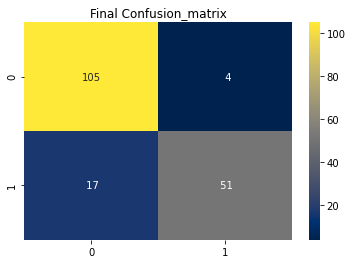

In [118]:
#Confusion Metrix for the final predictions 

sns.heatmap(confusion_matrix(y_val,final_pred),annot=True,fmt='3.0f',cmap="cividis")
plt.title('Final Confusion_matrix')
plt.show()

In [119]:
print("Accuracy Score of Mode1: ",accuracy_score(y_val,val_pred1))
print("Accuracy Score of Mode2: ",accuracy_score(y_val,val_pred2))
print("Accuracy Score of Mode3: ",accuracy_score(y_val,val_pred3))
print("Accuracy Score of Mode4: ",accuracy_score(y_val,val_pred4))
print(" ")
print("Accuracy Score of the final model is: ",accuracy_score(y_val,final_pred))

Accuracy Score of Mode1:  0.8587570621468926
Accuracy Score of Mode2:  0.8700564971751412
Accuracy Score of Mode3:  0.864406779661017
Accuracy Score of Mode4:  0.8587570621468926
 
Accuracy Score of the final model is:  0.8813559322033898


# FINAL PREDICTIONS ON THE TEST DATA

In [120]:
# Defining the function which will take tast data as the arguments
# Predict the Final Predictions

def final_test_predictions(df):
    test_prediction_1 = model1.predict(df)
    test_prediction_2 = model2.predict(df)
    test_prediction_3 = model3.predict(df)
    test_prediction_4 = model4.predict(df)
    final_prediction = np.array([])
    for i in range(0,len(df)):
        final_prediction = np.append(final_prediction,mode([test_prediction_1[i],test_prediction_2[i],test_prediction_3[i],test_prediction_4[i]]))
    return final_prediction

In [121]:
# Calling the function

final_test_predictions(test)

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

# FINAL PREDICTIOS ARE GENERATED

# TASK COMPLETED